In [ ]:
# prompt: git clone
!git clone https://github.com/zclawr/rpg-sentiment-analysis.git

Cloning into 'rpg-sentiment-analysis'...
remote: Enumerating objects: 109, done.
remote: Counting objects: 100% (109/109), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 109 (delta 36), reused 77 (delta 21), pack-reused 0 (from 0)
Receiving objects: 100% (109/109), 448.64 KiB | 2.04 MiB/s, done.
Resolving deltas: 100% (36/36), done.


# Data Exploration

In [ ]:
!cd ./rpg-sentiment-analysis/
!ls

rpg-sentiment-analysis	sample_data


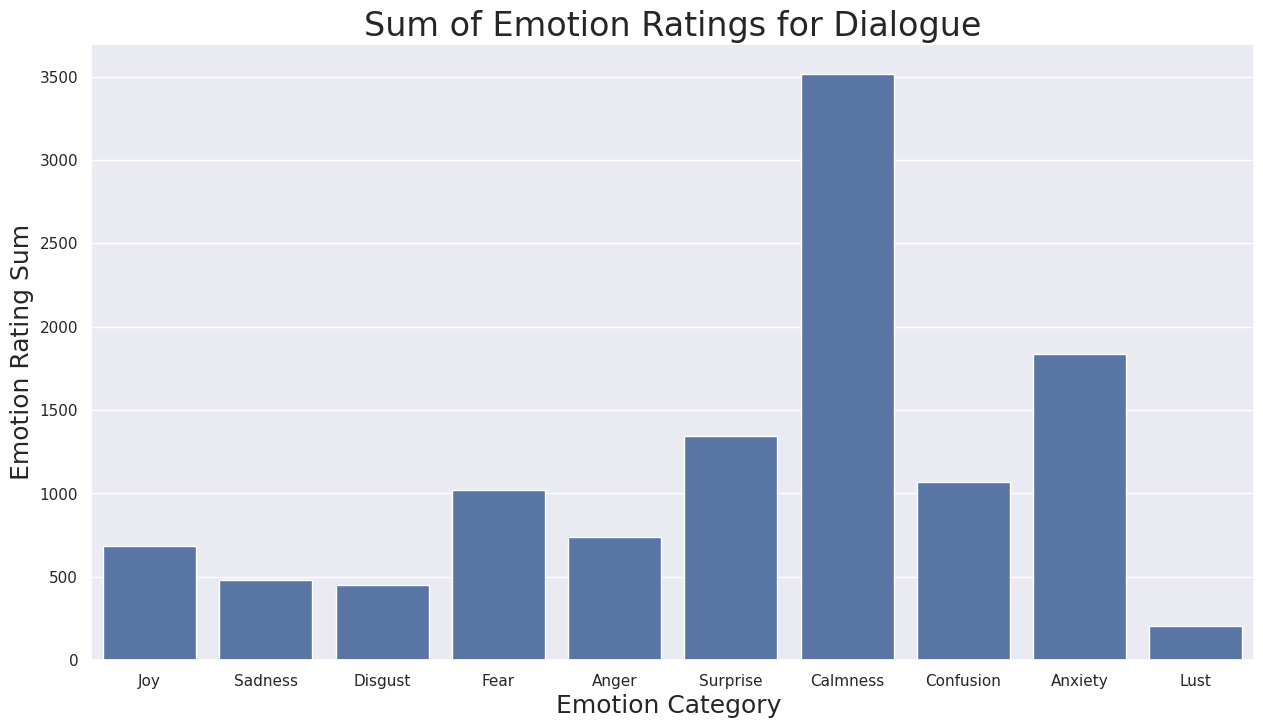

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./rpg-sentiment-analysis/combined_labels.csv')
df.head()

#Need the following:
# num observations
# details about data distributions
# scales
# missing data
# column descriptions
# Explain preprocessing in README

df_emotions = df.drop(columns=['Line', 'Movie', 'Character', 'Dialogue'])
df_emotions.head()
categories = list(df_emotions.columns.values)

sns.set(font_scale = 1)
plt.figure(figsize=(15,8))

df_emotions['Joy'] = pd.to_numeric(df_emotions['Joy'], errors='coerce')
df_emotions['Sadness'] = pd.to_numeric(df_emotions['Sadness'], errors='coerce')
df_emotions['Disgust'] = pd.to_numeric(df_emotions['Disgust'], errors='coerce')
df_emotions['Fear'] = pd.to_numeric(df_emotions['Fear'], errors='coerce')
df_emotions['Anger'] = pd.to_numeric(df_emotions['Anger'], errors='coerce')
df_emotions['Surprise'] = pd.to_numeric(df_emotions['Surprise'], errors='coerce')
df_emotions['Calmness'] = pd.to_numeric(df_emotions['Calmness'], errors='coerce')
df_emotions['Confusion'] = pd.to_numeric(df_emotions['Confusion'], errors='coerce')
df_emotions['Anxiety'] = pd.to_numeric(df_emotions['Anxiety'], errors='coerce')
df_emotions['Lust'] = pd.to_numeric(df_emotions['Lust'], errors='coerce')

axes = sns.barplot(x=categories, y=df_emotions.sum().values)

plt.title("Sum of Emotion Ratings for Dialogue", fontsize=24)
plt.ylabel('Emotion Rating Sum', fontsize=18)
plt.xlabel('Emotion Category ', fontsize=18)

plt.show()

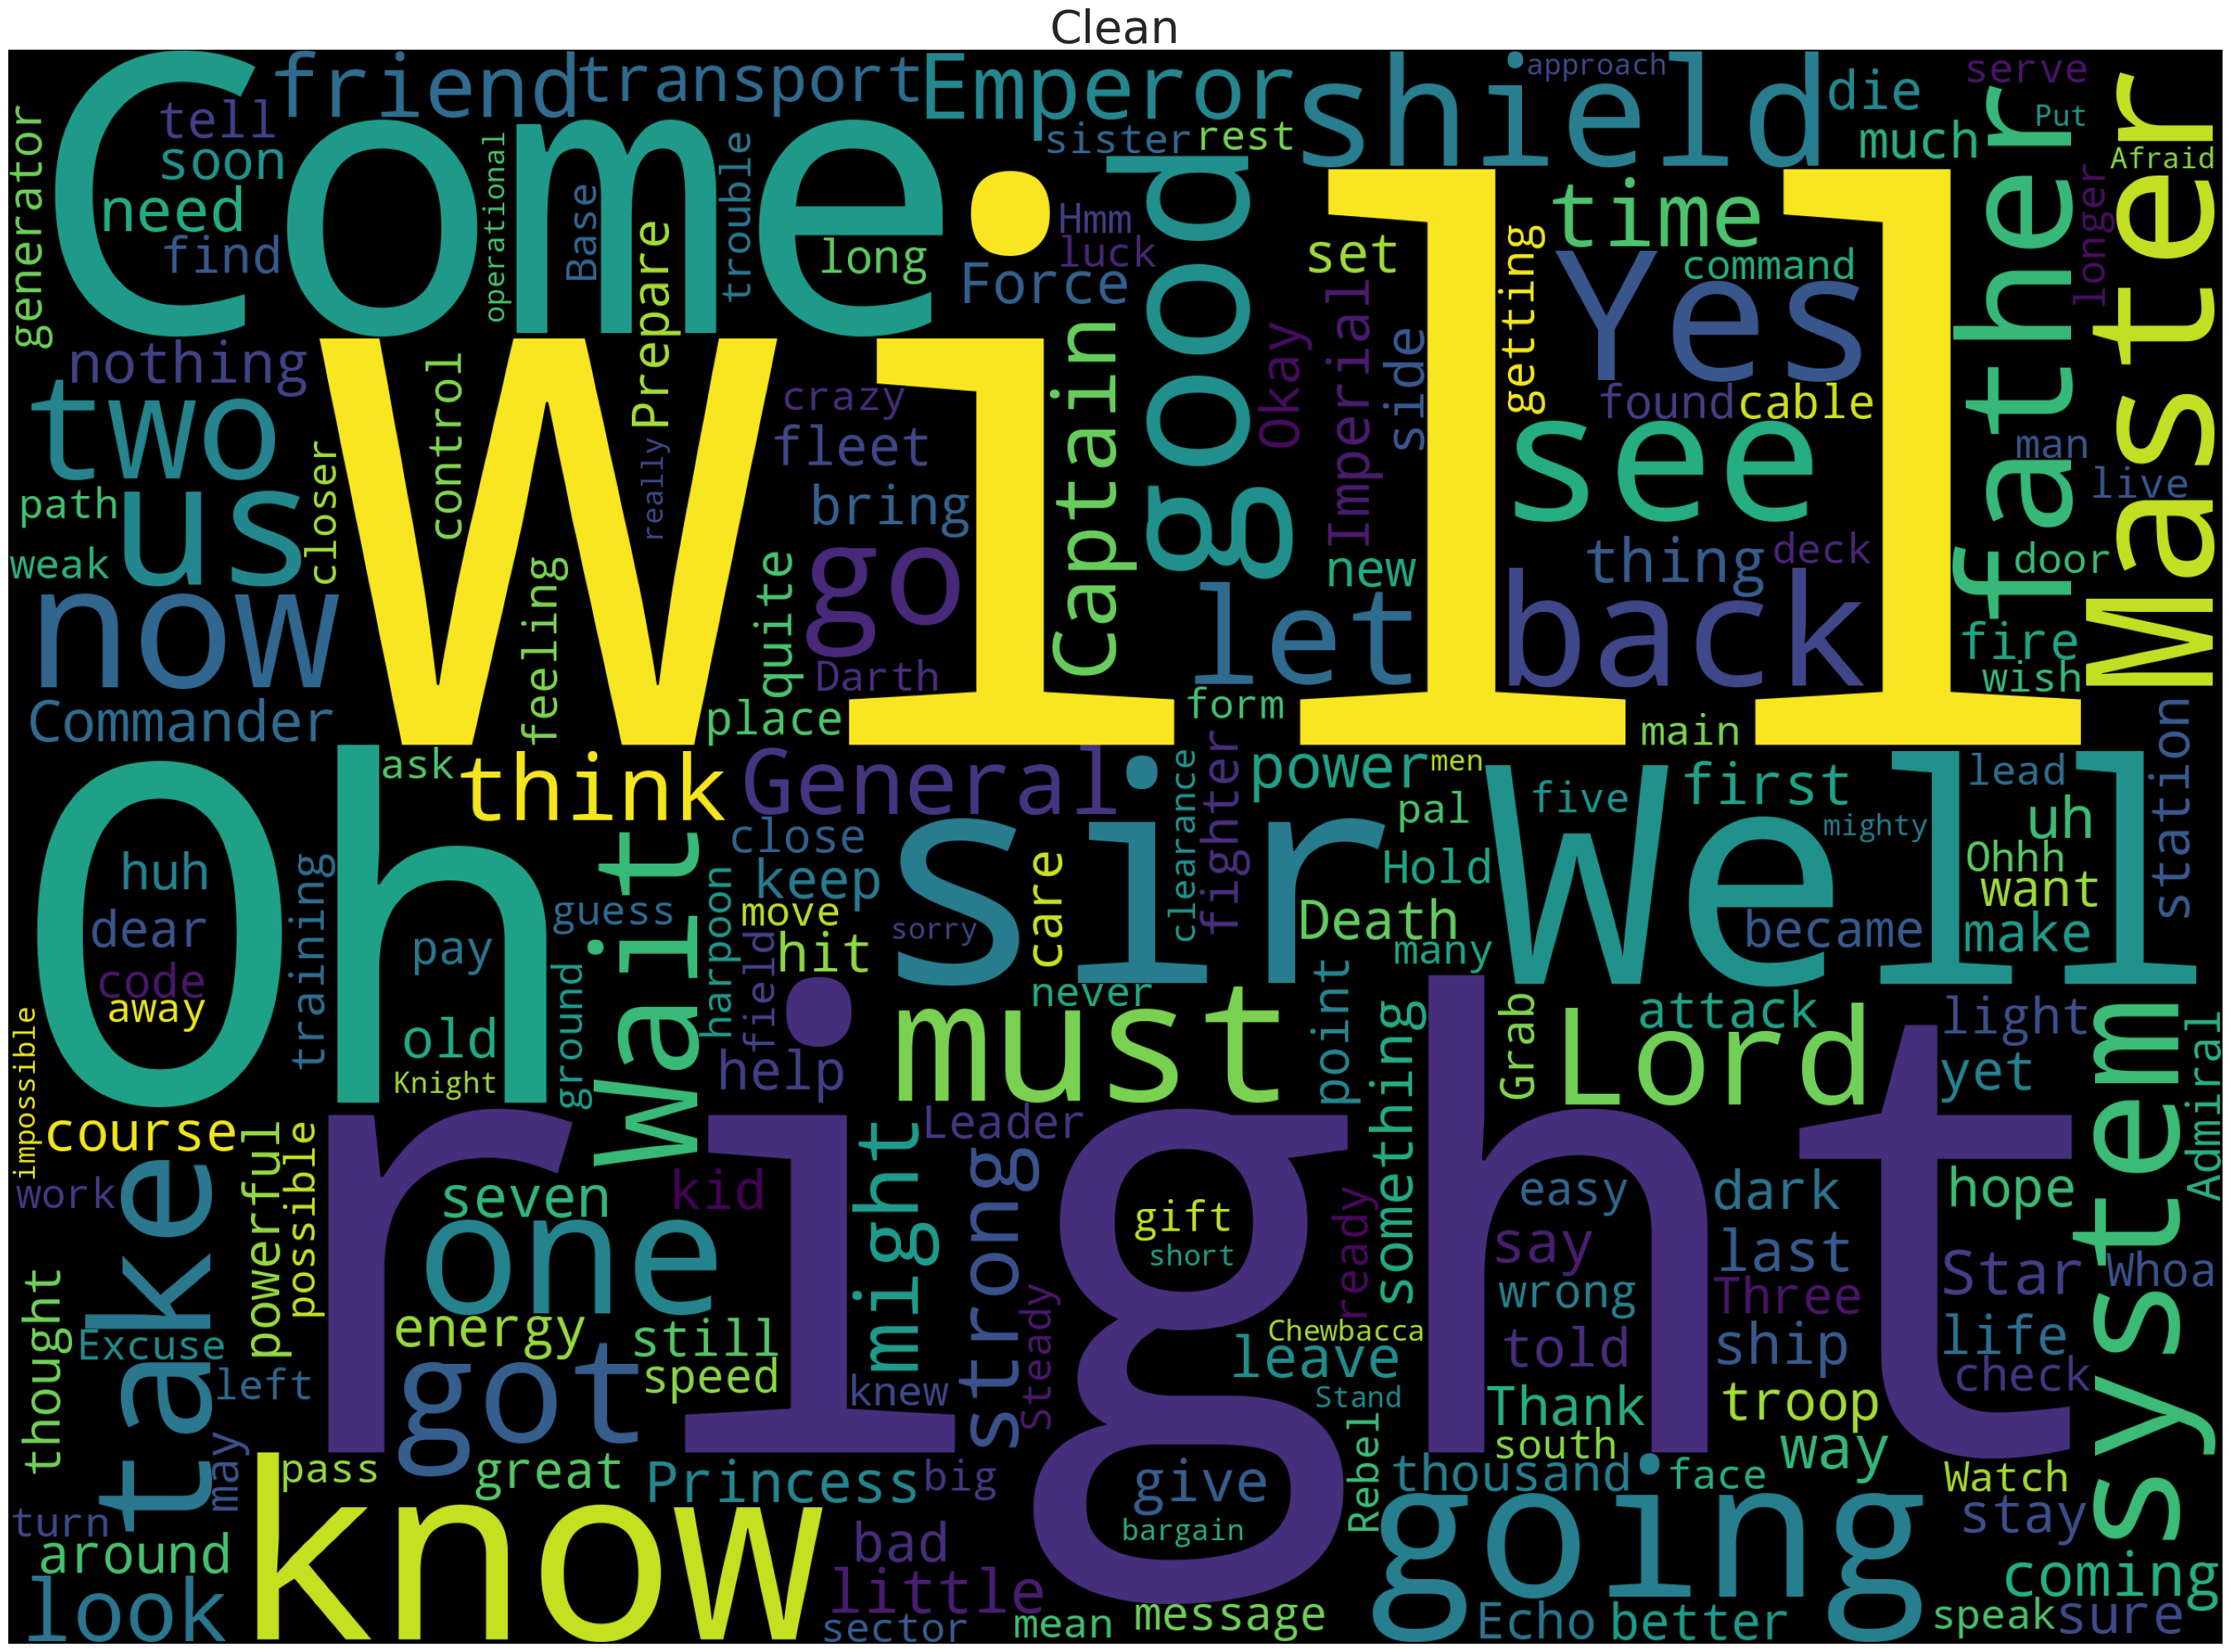

In [ ]:
from wordcloud import WordCloud,STOPWORDS

plt.figure(figsize=(40,25))
# clean
subset = df_emotions
stopwords = ['Luke', 'Solo', 'Jabba', 'Yoda', 'Han', 'Wookiee', 'Skywalker', 'Chewie', 'Dagobah', 'Hutt', 'Artoo', 'Threepio', 'Vader', 'Lando', 'Leia', 'Jedi', 'Ben', 'Rouge', 'droid', 'Dack'] + list(STOPWORDS)
text = df['Dialogue'].values
cloud_toxic = WordCloud(
                          stopwords=stopwords,
                          background_color='black',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)


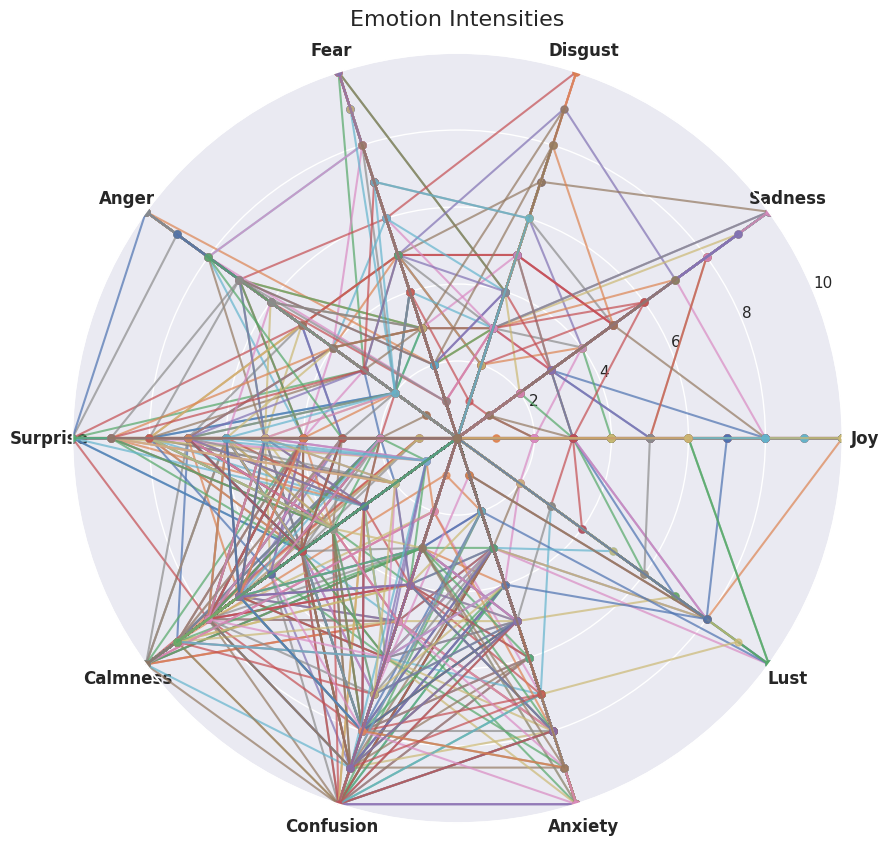

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('./rpg-sentiment-analysis/combined_labels.csv')
df_emotions = df.drop(columns=['Line', 'Movie', 'Character', 'Dialogue'])
df_emotions = df_emotions.dropna()

for col in df_emotions.columns:
    df_emotions[col] = pd.to_numeric(df_emotions[col], errors='coerce')
num_emotions = len(list(df_emotions.columns))

angles = np.linspace(0, 2 * np.pi, num_emotions, endpoint=False).tolist()
plt.figure(figsize=(10, 10), dpi=100)
ax = plt.subplot(111, polar=True)

for i in range(len(df)):
    values = df_emotions.iloc[i].values.tolist()
    values += values[:1]
    angle_values = angles + angles[:1]
    ax.plot(angle_values, values, marker='o', linestyle='-', markersize=5, alpha=0.7, label=f'Observation {i+1}')

# showing the emotions around the circle
angles += angles[:1]
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax.set_ylim(0, 10)

plt.title("Emotion Intensities", size=16, pad=20)
plt.show()

Perform the data exploration step (i.e. evaluate your data, # of observations, details about your data distributions, scales, missing data, column descriptions) Note: For image data you can still describe your data by the number of classes, # of images, plot example classes of the image, size of images, are sizes uniform? Do they need to be cropped? normalized? etc.
Plot your data. For tabular data, you will need to run scatters, for image data, you will need to plot your example classes.
How will you preprocess your data? You should only explain (do not perform pre-processing as that is in MS3) this in your README.md file and link your Jupyter notebook to it. All code and  Jupyter notebooks have be uploaded to your repo.
You must also include in your Jupyter Notebook, a link for data download and environment setup requirements:

